# ***Crop Recomendation Model 1 (simple model)***

## *Features*

*   Soil
*   Humidity
*   Temprature
*   Ph
*   Rainfall




## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
import warnings
import seaborn as sns
import pickle

warnings.filterwarnings('ignore')

## Reading The Dataset

In [ ]:
crops_with_soil_df1 = pd.read_csv("/content/drive/MyDrive/Dataset/Crops/Crop_with_soil (i).csv")
crops_with_soil_df2 = pd.read_csv("/content/drive/MyDrive/Dataset/Crops/Crop_with_soil (ii).csv")

## Exploring The Dataset 1

In [ ]:
# head
crops_with_soil_df1.head()

,soil,temperature,humidity,ph,rainfall,label
0,Alluvial,20.879744,82.002744,6.502985,202.935536,rice
1,Alluvial,21.770462,80.319644,7.038096,226.655537,rice
2,Alluvial,23.004459,82.320763,7.840207,263.964248,rice
3,Alluvial,26.491096,80.158363,6.980401,242.864034,rice
4,Alluvial,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#Important values
print(crops_with_soil_df1['label'].unique())
print(crops_with_soil_df1['soil'].unique())

['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']
['Alluvial' 'Red' 'Black' 'Loam' 'Sandy loam ' 'Red laterite'
 'Black cotton' 'Sandy' 'Laterite' 'Teelah' 'Clay' 'Clay loam'
 'Arid and Desert' 'loamy sand' 'River basins' 'clay' 'Light sandy'
 'Heavy clay' 'Dry sandy ' 'Heavy cotton' 'Sandy loam' 'Sandy clay loam'
 'Well drained' 'Drained loam' 'Red ' 'Gravelly sand'
 'Medium textured clay' 'Medium textured ']


In [ ]:
# Shapes
print("The Shape of the Dataset is: {}" .format(crops_with_soil_df1.shape))

The Shape of the Dataset is: (3100, 6)


In [ ]:
# Data types
print("crop dataset type 1\n")
print(crops_with_soil_df1.dtypes)

crop dataset type 1

soil            object
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [ ]:
# Descriptive Statistics
crops_with_soil_df1.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [ ]:
# Knowing unique values and there length
print("Number of labels: {}".format(crops_with_soil_df1['label'].nunique()))
print(crops_with_soil_df1['label'].value_counts())

Number of labels: 31
rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: label, dtype: int64


In [ ]:
# Check null values
print("crop dataset type 1\n")
print(crops_with_soil_df1.isnull().any())

crop dataset type 1

soil           False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool


## Data visualization

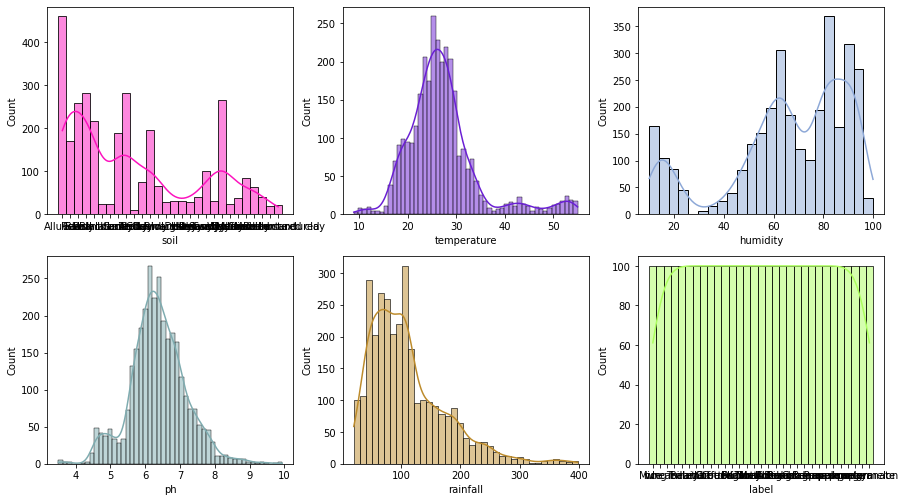

In [ ]:
columns1 = crops_with_soil_df1.columns
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns1:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(crops_with_soil_df1[column], kde = True, color = rgb, element = 'bars')
    i+=1
plt.show()

### Target values report

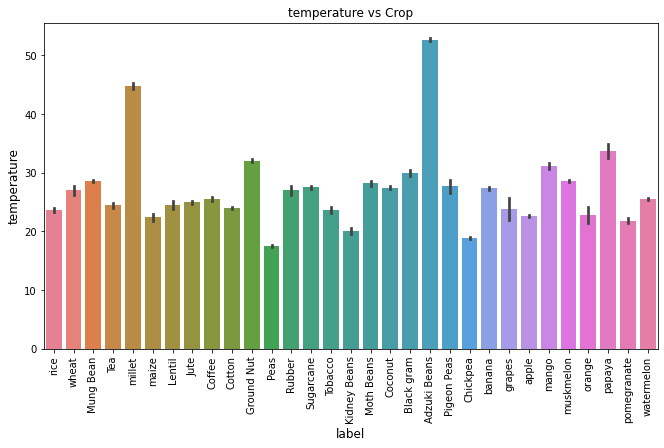

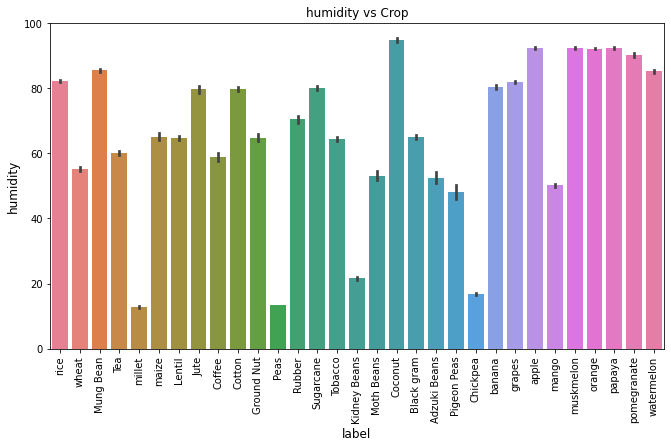

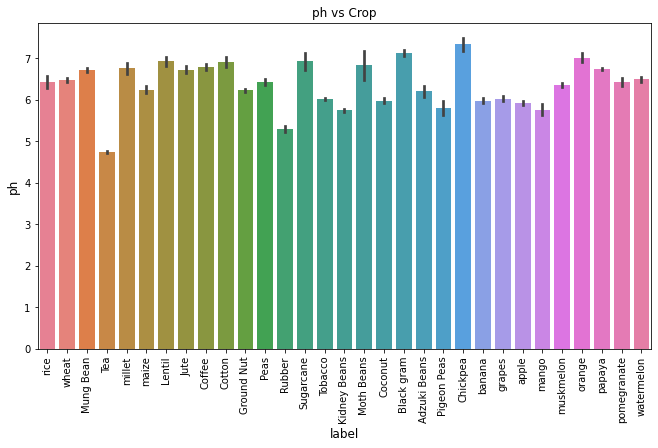

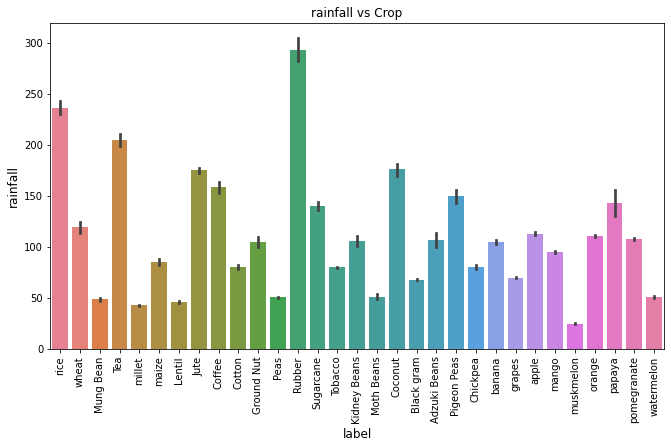

In [ ]:
numericColumns = columns1[1:-1]
for column in numericColumns:
    plt.figure(figsize = (11, 6))
    sns.barplot(data = crops_with_soil_df1, x = 'label', y = column,  palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

<Figure size 720x1224 with 0 Axes>

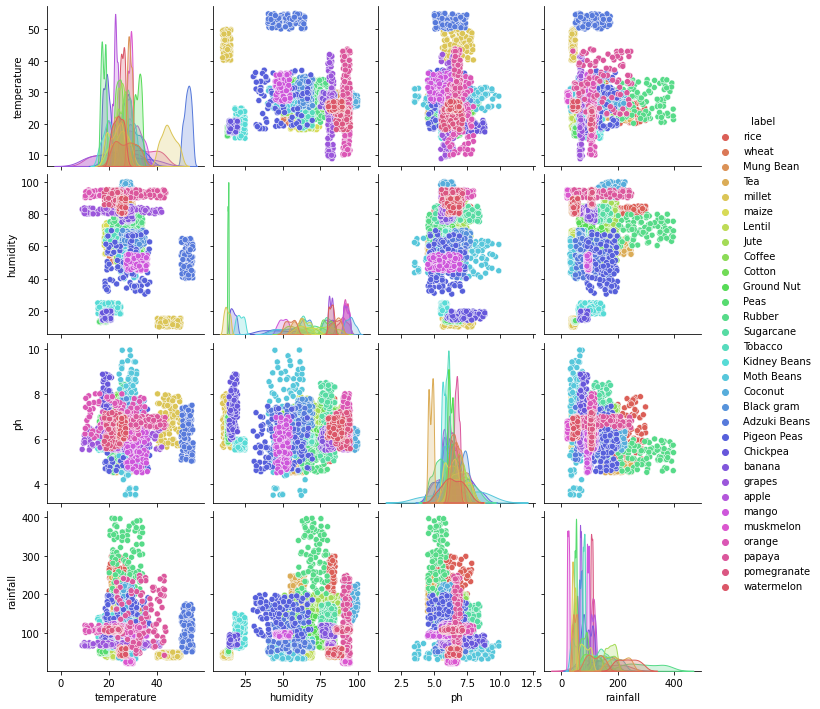

In [ ]:
plt.figure(figsize = (10, 17))
sns.pairplot(crops_with_soil_df1, hue = 'label', palette = 'hls')
plt.show()

### Correlation Matrix

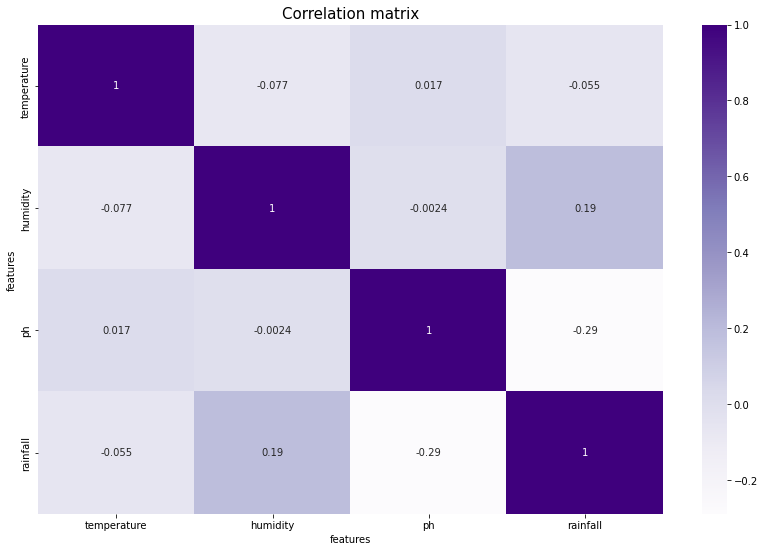

In [ ]:
#Correlation matrix dataset 1
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(crops_with_soil_df1.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

### Boxplots

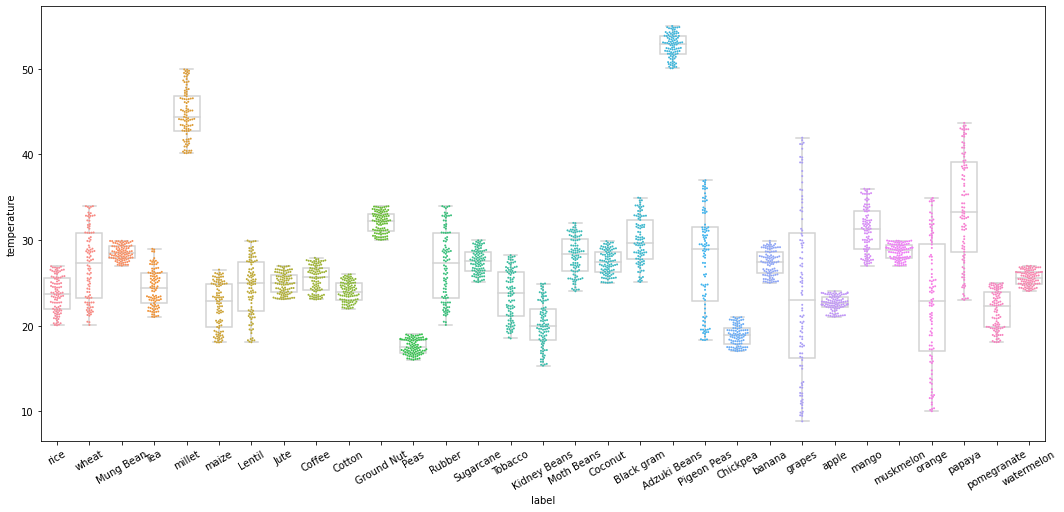

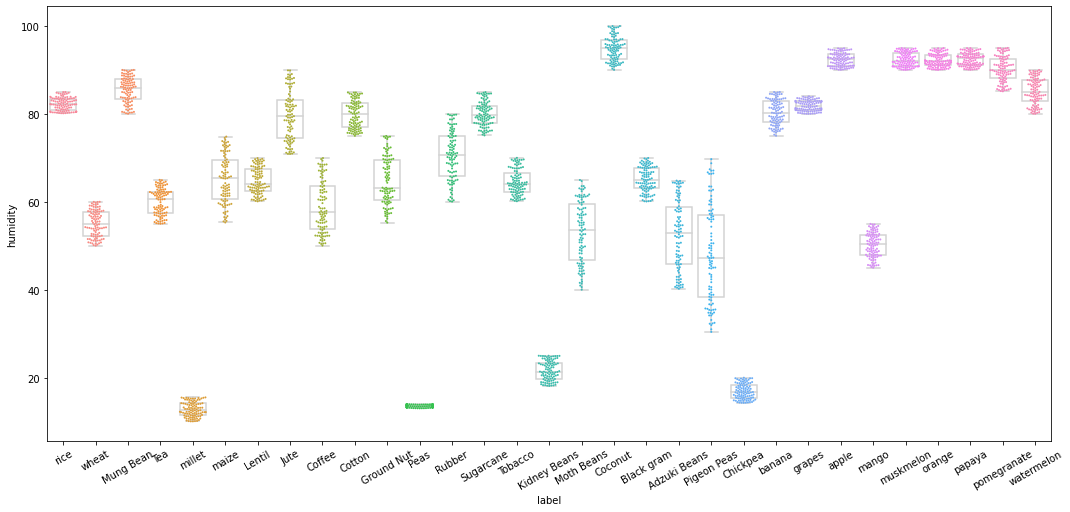

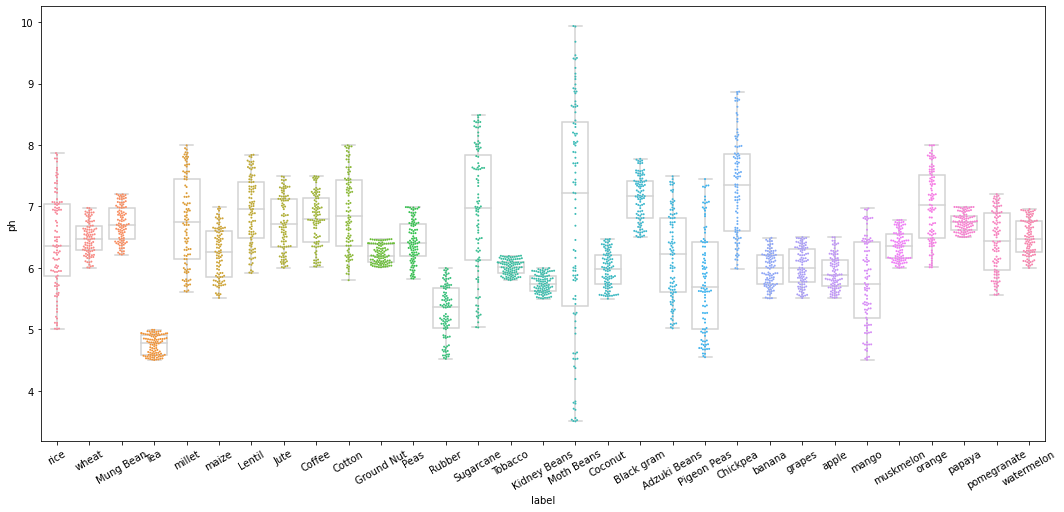

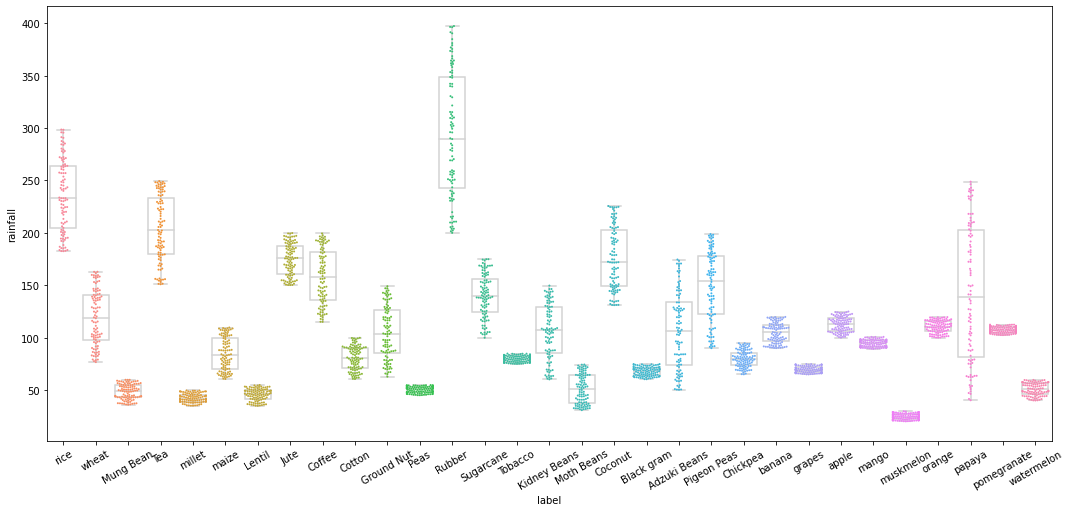

In [ ]:
# Boxplots by themselves are misleading (and Violinplots are exhausting)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor': 'lightgrey'},
    'medianprops':{'color':'lightgrey'},
    'whiskerprops':{'color':'lightgrey'},
    'capprops':{'color':'lightgrey'}
}
X = crops_with_soil_df1.drop(['label'], axis=1)
Y = X.drop(['soil'], axis=1)


for col in Y.columns:
    plt.figure(figsize = (18,8))
    ax = sns.boxplot(x="label", y=col, data=crops_with_soil_df1, **PROPS)
    ax = sns.swarmplot(x="label", y=col, data=crops_with_soil_df1, size=2)
    plt.xticks(rotation = 30)
    plt.show()

# Encoding and Fitting

In [ ]:
le1 = preprocessing.LabelEncoder()

crops_with_soil_df1['soil'] = le1.fit_transform(crops_with_soil_df1['soil'])
print(crops_with_soil_df1.head())

   soil  temperature   humidity        ph    rainfall label
0     0    20.879744  82.002744  6.502985  202.935536  rice
1     0    21.770462  80.319644  7.038096  226.655537  rice
2     0    23.004459  82.320763  7.840207  263.964248  rice
3     0    26.491096  80.158363  6.980401  242.864034  rice
4     0    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
features_df1 = crops_with_soil_df1[['soil', 'temperature', 'humidity', 'ph', 'rainfall']]
target_df1 = crops_with_soil_df1['label']
labels_df1 = crops_with_soil_df1['label']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_df1, Xtest_df1, Ytrain_df1, Ytest_df1 = train_test_split(features_df1,target_df1,test_size = 0.2,random_state =2)

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_df1 = RandomForestClassifier(n_estimators=20, random_state=0)
RF_df1.fit(Xtrain_df1,Ytrain_df1)

RF's Accuracy of 1st Dataset is:  0.9661290322580646
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       1.00      1.00      1.00        21
    Chickpea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.94      1.00      0.97        15
      Cotton       1.00      0.93      0.97        15
  Ground Nut       0.95      1.00      0.97        19
        Jute       0.95      0.95      0.95        19
Kidney Beans       1.00      1.00      1.00        17
      Lentil       0.95      1.00      0.97        19
  Moth Beans       1.00      0.96      0.98        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       1.00      0.91      0.95        23
      Rubber       0.96      1.00      0.98        24
   Sugarcane       0.86      0.86      0.86        14
         Tea       1.00     

# Predict Accuracy

In [ ]:
predicted_values_df1 = RF_df1.predict(Xtest_df1)

x_df1 = metrics.accuracy_score(Ytest_df1, predicted_values_df1)
print("RF's Accuracy of 1st Dataset is: ", x_df1)

RF's Accuracy of 1st Dataset is:  0.9661290322580646


# Report

In [ ]:
print(classification_report(Ytest_df1,predicted_values_df1))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       1.00      1.00      1.00        21
    Chickpea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.94      1.00      0.97        15
      Cotton       1.00      0.93      0.97        15
  Ground Nut       0.95      1.00      0.97        19
        Jute       0.95      0.95      0.95        19
Kidney Beans       1.00      1.00      1.00        17
      Lentil       0.95      1.00      0.97        19
  Moth Beans       1.00      0.96      0.98        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       1.00      0.91      0.95        23
      Rubber       0.96      1.00      0.98        24
   Sugarcane       0.86      0.86      0.86        14
         Tea       1.00      0.95      0.97        19
     Tobacco       1.00    

# Confusion Matrix

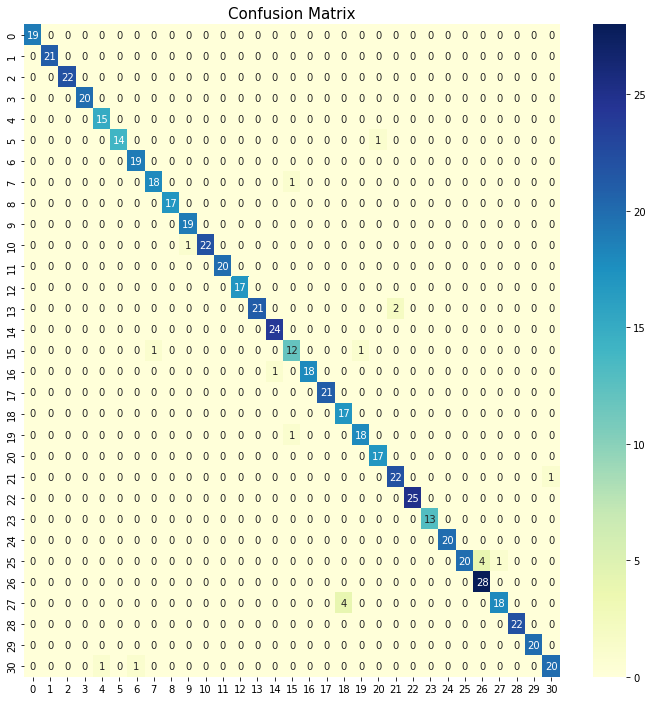

In [ ]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Ytest_df1, predicted_values_df1)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Prediction

In [ ]:
def call_simple_model(soil, temp, humidity, ph, rainfall):
  data_df1 = np.array([[soil,temp, humidity, ph, rainfall]])
  prediction = RF_df1.predict(data_df1)
  print(prediction)

def engine(model):
  print("Please input values\n")
  soil = input("please choose soil type\n")
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  ph = input("please enter ph \n")
  rain = input("please enter also rainfall in mm\n")
  convertedLabel = le1.transform([soil])
  call_simple_model(convertedLabel, int(temp),int(humi),int(ph), int(rain))
 


# Saving Model

In [ ]:
# save the model to disk
filename = 'crops_recomendation_model1.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_out = open(path+filename, 'wb')
pickle.dump(RF_df1, pickle_out)
pickle_out.close()

# Loading Model

In [ ]:
filename = 'crops_recomendation_model1.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_in = open(path+filename, 'rb')
crops_recomendation_model1 = pickle.load(pickle_in)

# Checking Model and printing Results

In [ ]:
# results = crops_recomendation_model1.score(Xtest_df1, Ytest_df1)
# print(results)
def engine():
  print("Please input values\n")
  soil = input("please choose soil type\n")
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  ph = input("please enter ph \n")
  rain = input("please enter also rainfall in mm\n")
  convertedLabel = le1.transform([soil])
  data = np.array([[convertedLabel,int(temp), int(humi), int(ph), int(rain)]])
  prediction_crop = crops_recomendation_model1.predict(data)
  print(prediction_crop)

engine()

Please input values

please choose soil type
Alluvial
please input temp
20
enter humidity
80
please enter ph 
6
please enter also rainfall in mm
200
['rice']


# Loading Model

In [ ]:
# /content/drive/MyDrive/TrainedModels/crops_recomendation_model1.pickle

In [ ]:
# features_df2 = crops_with_soil_df2[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall', 'soil']]
# target_df2 = crops_with_soil_df2['label']
# labels_df2 = crops_with_soil_df2['label']



# elif (opt == 2):
#   n = input("please input ratio of Nitrogen content in soil\n")
#   p = input("please input ratio of Phosphorous content in soil\n")
#   k = input("Please input ratio of Potassium content in soil\n")
#   soil = input("please choose soil type\n")
#   temp = input("please input Temperature degree Celsius\n")
#   humi = input("please enter relative humidity in %\n")
#   ph = input("please enter ph \n")
#   rain = input("please enter also rainfall in mm\n")
#   convertedLabel = le2.transform([soil])
#   call_advance_model(float(n), float(p),float(k), float(temp), float(humi),float(ph), float(rain), convertedLabel)


# def call_advance_model(n,p,k, temp, humidity, ph, rainfall,soil):
#   data_df2 = np.array([[n,p,k,soil,temp, humidity, ph, rainfall]])
#   prediction = RF_df2.predict(data_df2)
#   print(prediction)